In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

import plotly.graph_objs as go

In [2]:
def var(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

In [3]:
def show_figure(data, data_title):
    plt.figure(figsize=(6,4))
    plt.title(data_title)
    plt.plot(data)
    plt.xlim(0, len(data))
    plt.show()

In [3]:
# Get file
data1 = []
data2 = []

path1 = 'ConventionalModel/run-class-tag-val_acc.csv' #'Test/half_data_test.csv'
# path2 = 'ConventionalModel/run-class-tag-train_loss.csv' #'Test/half_data_test_2.csv'
    
with open(path1, newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',')
    headers = next(rows)
    for row in rows:
        data1.append(float(row[2]))

# with open(path2, newline='') as csvfile:
#     rows = csv.reader(csvfile, delimiter=',')
#     headers = next(rows)
#     for row in rows:
#         data2.append(float(row[2]))

data = data1

# for a, b in zip(data1, data2):
    # data.append((a + b) / 2)
    # data.append(a)

d = np.array(data)
result = []

para = 10

for i in range(int(len(data) / para)):
    mean = np.mean(data[i * para:i * para + para])
    result.append(float(mean))

variance = var(result)
v = [variance for _ in range(len(result))]
print("result length: {}".format(len(result)))


dd = np.array(data1)
mean = np.mean(dd)
print("mean accuracy: {}".format(mean))



NameError: name 'var' is not defined

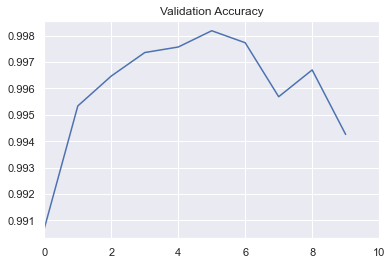

Text(0.5, 1.0, 'Regression Trend of Validation Accuracy')

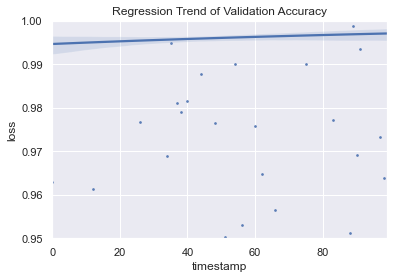

<Figure size 576x288 with 0 Axes>

In [24]:
show_figure(result, "Validation Accuracy")

timestamp = [i for i in range(len(data))]

assert len(timestamp) == len(data)

dataset = {'timestamp': timestamp, 'loss': data}

df = pd.DataFrame(data=dataset)

sns.set_theme(color_codes=False)
ax = sns.regplot(x='timestamp', y='loss', data=df, logistic=True, y_jitter=0.1, scatter_kws={"s": 3})
plt.ylim(0.95, 1)
plt.figure(figsize=(8,4))
# plt.xlim(-10, 1000)
ax.set_title("Regression Trend of Validation Accuracy")

In [4]:
print(len(data1))

100
